### Importing the  library

In [50]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams["figure.figsize"]=(20,20)

In [51]:
df1 = pd.read_csv("Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [52]:
df1.shape

(13320, 9)

In [55]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [56]:
# now we want to count area sample from the area_type  
a = df1.groupby(['area_type','location'])
a.first()

availability   size  society  \
area_type            location                                              
Built-up  Area        Anekal               Ready To Move   1 RK     None   
                      Devarabeesana Halli  Ready To Move  3 BHK  Sorisa    
                      Devarachikkanahalli  Ready To Move  2 BHK  Sarch M   
                      Electronic City      Ready To Move   1 RK  GMown E   
                      Mysore Highway       Ready To Move  1 BHK     None   
...                                                  ...    ...      ...   
Super built-up  Area rr nagar              Ready To Move  2 BHK     None   
                     sapthagiri Layout     Ready To Move  2 BHK     None   
                     sarjapura main road   Ready To Move  4 BHK     None   
                     vinayakanagar         Ready To Move  7 BHK     None   
                     whitefiled                   20-Dec  2 BHK     None   

                                          total_sqft  bath  balcony   price  
area_type            location                                                
Built-up  Area        Anekal                     351   1.0      1.0   16.00  
                      Devarabeesana Halli       1750   3.0      3.0  149.00  
                      Devarachikkanahalli       1116   2.0      1.0   47.00  
                      Electronic City            435   1.0      1.0   19.50  
                      Mysore Highway             600   1.0      1.0   17.00  
...                                              ...   ...      ...     ...  
Super built-up  Area rr nagar                   1400   2.0      2.0   60.00  
                     sapthagiri Layout          1300   1.0      1.0  115.00  
                     sarjapura main road        2400   4.0      3.0  250.00  
                     vinayakanagar              1200   5.0      2.0  200.00  
                     whitefiled                  935   2.0      1.0   32.73  

[2322 rows x 7 columns]

In [57]:
df1.area_type.value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [58]:
# another way is groupby and aggrigate the count
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

##### Data Cleaning
* drop the columns which not affect during Prediction

In [59]:
df1.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [60]:
df2 = df1.drop(['area_type','availability','balcony','society'],axis = 1)
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [61]:
df2.isna().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [62]:
# the number of null value is minimalistic so we drop the null value 
df3 = df2.dropna()
df3.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [64]:
df3.shape

(13246, 5)

In [68]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In this 4 bhk and 4 bedroom both are the same 

### Feature Engineering
* Add new feature(integer) for bhk (bedrooms hall kitchen)

In [70]:
df3.dtypes

location       object
size           object
total_sqft     object
bath          float64
price         float64
dtype: object

In [74]:
df3['BHK'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))

/home/arcgate/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [75]:
df3.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [77]:
df3['BHK'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [86]:
# let's explore the data 
df3[df3['BHK']>10][['size','total_sqft','price']]

,size,total_sqft,price
459,11 BHK,5000,360.0
1718,27 BHK,8000,230.0
1768,11 Bedroom,1200,170.0
3379,19 BHK,2000,490.0
3609,16 BHK,10000,550.0
3853,11 Bedroom,1200,150.0
4684,43 Bedroom,2400,660.0
4916,14 BHK,1250,125.0
6533,12 Bedroom,2232,300.0
7979,11 BHK,6000,150.0


From above data 
* 43 bedroom which contain 2400 sqft not posible 
* these type of error are the outlier and we resolve this type of error

In [87]:
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

* from above output we observe that it contain the range so we can put the avg b/w this range and counts as single value 
* we build the function to get those value which contain the range
* "~" this is naget-[This reflect "except" condition]

In [88]:
def isfloat(x):
    try:
        float(x)
    except:
        return False
    return True

In [91]:
df3[df3['total_sqft'].apply(isfloat)].head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [93]:
# negate -- retrun the false value
df3[~df3['total_sqft'].apply(isfloat)]

,location,size,total_sqft,bath,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [94]:
# now we have to convert this range function 

def convert_sqft_tonum(x):
    token = x.split("-")
    if len(token) == 2:
        return (float(token[0])+float(token[1]))/2
    try:
        return float(x)
    except:
        return None

In [96]:
print(convert_sqft_tonum('186'))
print(convert_sqft_tonum('1042-1105'))
print(convert_sqft_tonum('125Meter'))

186.0
1073.5
None


In [98]:
df4 = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_tonum) 
df4.head()


,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [99]:
df3.iloc[30]

location        Yelahanka
size                4 BHK
total_sqft    2100 - 2850
bath                    4
price                 186
BHK                     4
Name: 30, dtype: object

In [100]:
df4.iloc[30]

location      Yelahanka
size              4 BHK
total_sqft         2475
bath                  4
price               186
BHK                   4
Name: 30, dtype: object

#### Feature Engineering
* Add new feature called price per square feet
* In this cell we calculate the per square feet rate

In [101]:
df5 = df4.copy()
df5['rate_per_sqft'] = df5['price']*1000000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,BHK,rate_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,36998.106061
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,46153.846154
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,43055.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,62458.908613
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,42500.000000


In [107]:
len(df5.location.unique())

1304

In [108]:
df5.location.value_counts()

Whitefield           534
Sarjapur  Road       392
Electronic City      302
Kanakpura Road       266
Thanisandra          233
                    ... 
T c palya              1
Mudalpalaya            1
NR Colony              1
BDS Layout             1
Bande Nallasandra      1
Name: location, Length: 1304, dtype: int64

In [111]:
df5.location = df5.location.apply(lambda x: x.strip())
location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending = False)
location_stats

location
Whitefield           535
Sarjapur  Road       392
Electronic City      304
Kanakpura Road       266
Thanisandra          236
                    ... 
LIC Colony             1
Kuvempu Layout         1
Kumbhena Agrahara      1
Kudlu Village,         1
1 Annasandrapalya      1
Name: location, Length: 1293, dtype: int64

* Now we add the Threshold of location counts = 10

In [112]:
len(location_stats[location_stats<=10])

1052

In [115]:
location_less_10 =location_stats[location_stats<10]
location_less_10

location
Chandra Layout        9
Jakkur Plantation     9
2nd Phase JP Nagar    9
Yemlur                9
Mathikere             9
                     ..
LIC Colony            1
Kuvempu Layout        1
Kumbhena Agrahara     1
Kudlu Village,        1
1 Annasandrapalya     1
Name: location, Length: 1039, dtype: int64

In [116]:
len(df5.location.unique())

1293

* In case only 242 location is repetively use more than 10 times and less than 10 time repeate only 1052 it huge portion from the enitire data
* if location <10 repeate then we put the name = "other" and 

In [118]:
df5.location = df5.location.apply(lambda x: "other" if x in location_less_10 else x)

In [120]:
len(df5.location.unique())

255

In [121]:
df5.location.value_counts()

other                   2751
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
                        ... 
Naganathapura             10
Kalkere                   10
Nagappa Reddy Layout      10
Nagadevanahalli           10
Dairy Circle              10
Name: location, Length: 255, dtype: int64

In [122]:
df5.head()

,location,size,total_sqft,bath,price,BHK,rate_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,36998.106061
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,46153.846154
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,43055.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,62458.908613
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,42500.000000


#### Outlier detection an remover

* using the Standard Deviation or simple domain knowledge

In [134]:
# in case let take avg room size for 1 bedroom let take 300 sqft
df5[df5['total_sqft']/df5.BHK <300].head()

,location,size,total_sqft,bath,price,BHK,rate_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,362745.098039
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,333333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,106609.808102
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,62962.962963
70,other,3 Bedroom,500.0,3.0,100.0,3,200000.000000


* 600 sqft with 8 bedroom it mean 75 per room it not mean to be sutable situation.

In [136]:
df5.shape

(13246, 7)

In [140]:
df6 = df5[~(df5.total_sqft/df5.BHK<300)]
df6.head()

,location,size,total_sqft,bath,price,BHK,rate_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,36998.106061
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,46153.846154
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,43055.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,62458.908613
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,42500.000000


In [142]:
df6.shape

(12502, 7)

In [153]:
df6.rate_per_sqft.describe().apply(lambda x:format(x,'f'))

count      12456.000000
mean       63085.028260
std        41681.273385
min         2678.298133
25%        42105.263158
50%        52941.176471
75%        69166.666667
max      1764705.882353
Name: rate_per_sqft, dtype: object

* if our data is normal distribution so around 68% data point lie b/w mean and standard deviation

In [154]:
# remove the outlier of rate_per_sqft
def remove__rps_outliers(df):
    df_out = pd.DataFrame()
    for key,subdf in df.groupby('location'):  # groupby on the basis of location 
        m = np.mean(subdf.rate_per_sqft)     # mean
        st = np.std(subdf.rate_per_sqft)     # standard deviation
        reduced_df = subdf[(subdf.rate_per_sqft>(m-st)) & (subdf.rate_per_sqft < (m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out


df7 = remove__rps_outliers(df6)
df7.shape

(10222, 7)

In [155]:
df7.head()

,location,size,total_sqft,bath,price,BHK,rate_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,150175.438596
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,119018.404908
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,125333.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,108333.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,119838.056680


In [156]:
import matplotlib.pyplot as plt

def plot_scatter_chart(df,location):
    bhk2 = df[(df.location == location) & (df.BHK ==2)]
    bhk3 = df[(df.location == location) & (df.BHK ==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    
    plt.scatter(bhk2.total_sqft, bhk2.price, color='Blue', label = '2 Bhk', s = 50)
    plt.scatter(bhk3.total_sqft, bhk3.price, color = 'green', marker = '+',label = '3 Bhk',s = 50)
    plt.xlabel("total Square Foot")
    plt.ylabel('Price')
    plt.title(location)
    plt.legend()
    

In [160]:
df7.location.value_counts().head(9)

other                    2201
Whitefield                479
Sarjapur  Road            296
Electronic City           279
Kanakpura Road            190
Yelahanka                 169
Uttarahalli               167
Raja Rajeshwari Nagar     164
Thanisandra               152
Name: location, dtype: int64

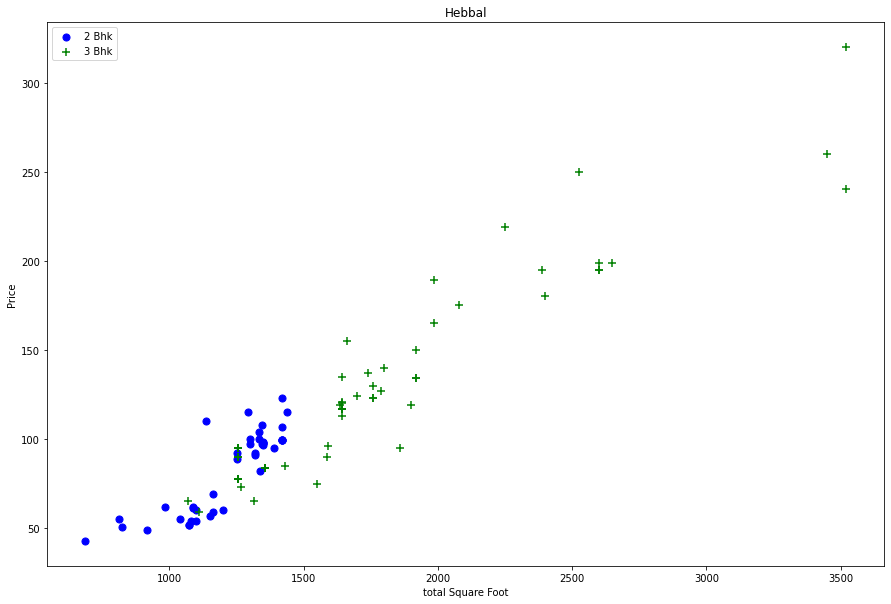

In [162]:
plot_scatter_chart(df7,'Hebbal')

##### Remove the outlier

In [165]:
def remove_bhk_outliers(df):
    exclude_indices=np.array([])
    for location, location_df in df.groupby('location'):
        bhk_sats={}
        for BHK,BHK_df in location_df.groupby('BHK'):
            bhk_sats[BHK]={
                'mean':np.mean(BHK_df.rate_per_sqft),
                'std':np.std(BHK_df.rate_per_sqft),
                'count':BHK_df.shape[0]
            }
        for BHK,BHK_df in location_df.groupby('BHK'):
            stats=bhk_sats.get(BHK-1)
            if stats and stats['count']>5:
                exclude_indices=np.append(exclude_indices,BHK_df[BHK_df.rate_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [168]:
df8 = remove_bhk_outliers(df7)
df8.shape

(7369, 7)

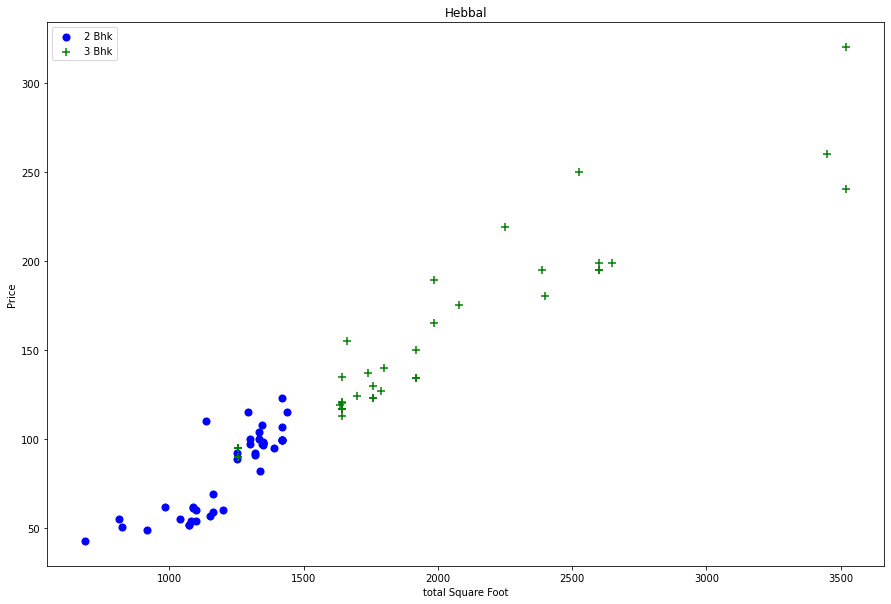

In [169]:
plot_scatter_chart(df8,'Hebbal')

Text(0, 0.5, 'counts')

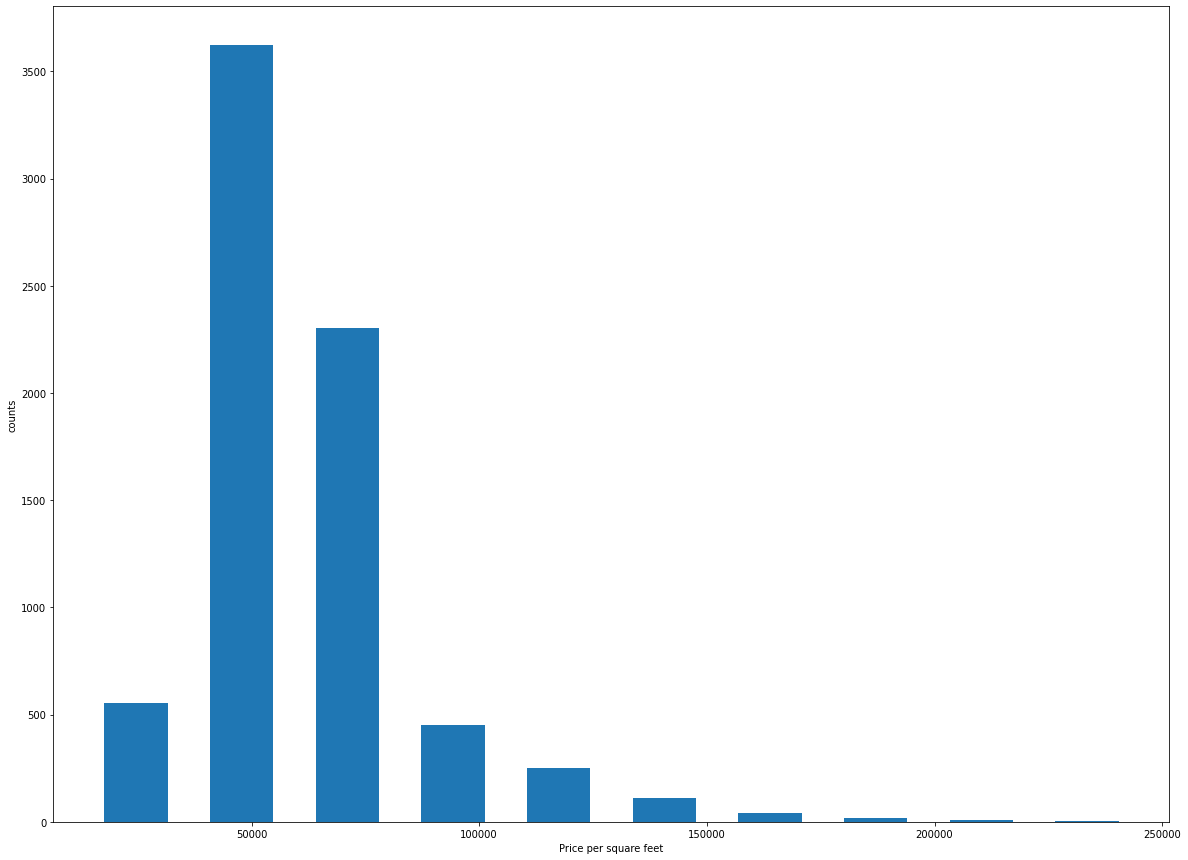

In [170]:
plt.rcParams['figure.figsize'] = (20,15)
plt.hist(df8.rate_per_sqft, rwidth=0.6)
plt.xlabel('Price per square feet')
plt.ylabel("counts")

##### Outlier Removal Using Bathrooms Features

In [171]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6., 14.,  7.,  9., 12., 16., 13.])

In [172]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,BHK,rate_per_sqft
585,BTM 1st Stage,9 Bedroom,3300.0,14.0,500.0,9,151515.151515
5344,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,40000.000000
8547,other,10 BHK,12000.0,12.0,525.0,10,43750.000000
8633,other,16 BHK,10000.0,16.0,550.0,16,55000.000000
9329,other,11 BHK,6000.0,12.0,150.0,11,25000.000000
9642,other,13 BHK,5425.0,13.0,275.0,13,50691.244240


Text(0, 0.5, 'Counts')

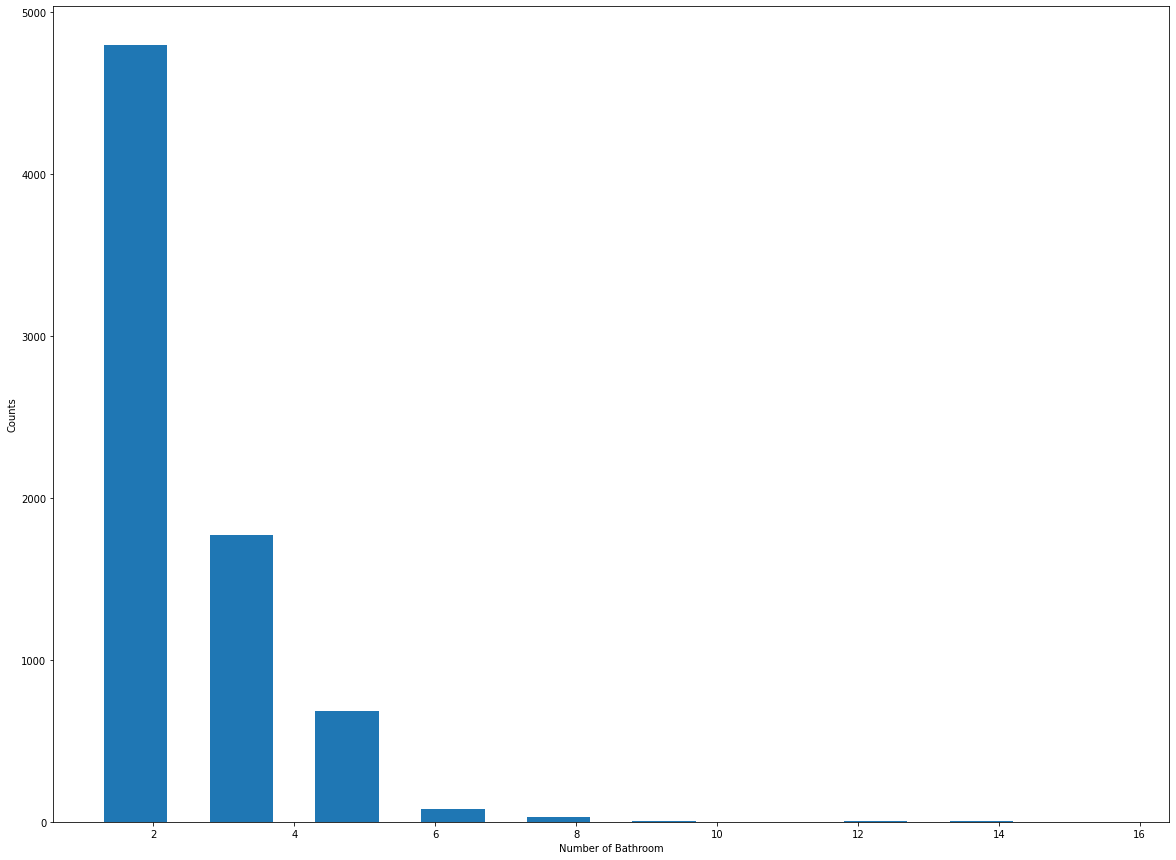

In [173]:
plt.rcParams['figure.figsize'] = (20,15)
plt.hist(df8.bath,rwidth = 0.6)
plt.xlabel("Number of Bathroom")
plt.ylabel("Counts")

In [175]:
# in this we can say that best combination is 2 room with single bathroom and bath<bhk+2  at least 2 bhk 
df8[df8.bath>df8.BHK+2]

,location,size,total_sqft,bath,price,BHK,rate_per_sqft
585,BTM 1st Stage,9 Bedroom,3300.0,14.0,500.0,9,151515.151515
1642,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,32520.325203
5305,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,64285.714286
6792,Thanisandra,3 BHK,1806.0,6.0,116.0,3,64230.343300
8476,other,6 BHK,11338.0,9.0,1000.0,6,88198.976892


Text(0, 0.5, 'counts')

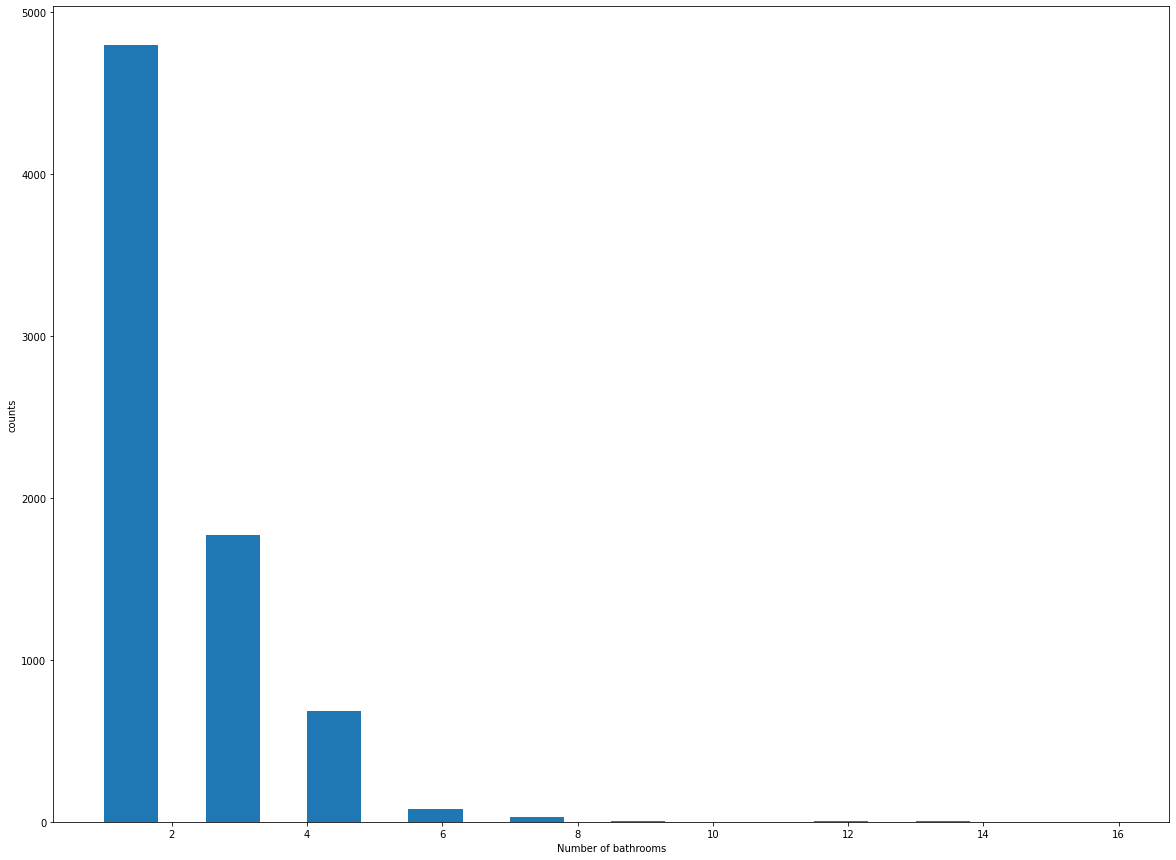

In [176]:
# df8[df8.bath>df8.BHK+2]   mark as outlier

In [177]:
df9 = df8[df8.bath < df8.BHK+2]
df9.shape

(7291, 7)

* Now our data is look preety much neet and clean so we can train data before we can drop the columns and convert the "string" data into numerical

In [178]:
df10 = df9.drop(['size','rate_per_sqft'],axis =1)
df10.head()

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [179]:
# machine learning algorithm cannot interpert the text columns --> either we use "oneHot encoding" ---> dummies

dummies = pd.get_dummies(df10.location)
dummies.head()

,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [181]:
# now concat the dummies col with df10 during the concat we must drop (one col.) last col from the dummie 

df11 = pd.concat([df10, dummies.drop('other',axis=1)],axis=1)
df11.head()

,location,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [182]:
# now there is no need of the location col so we can drop the location col 
df12 = df11.drop('location',axis = 1)
df12.head()

,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##### Build a Model 

In [183]:
df12.shape

(7291, 258)

In [184]:
# now we want to find the price so
X = df12.drop('price',axis = 1)
X.head()

,total_sqft,bath,BHK,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [187]:
y = df12.price

In [188]:
# Now split the data into train and test 

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [193]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8609176699531332

#####  USE "K- Fold Cross Validation" to measure accuracy of our Linear Regression model

In [196]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)

cross_val_score(LinearRegression(),X,y, cv= cv)

array([0.84196276, 0.82904236, 0.90136194, 0.85131228, 0.84354632])

### GridSearchCV  ---> Find best model

In [198]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression':{
            'model': LinearRegression(),
            'params':{
                'normalize':[True,False]
            }
        },
        'lasso':{
            'model':Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        },
        'decision_tree':{
            'model':DecisionTreeRegressor(),
            'params':{
                'criterion':['mse','friedman_mse'],
                'splitter':['best','random']
            }
        }
    }
    
    score = []
    cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'],cv = cv, return_train_score = False)
        gs.fit(X,y)
        score.append({
            'model':algo_name,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_
        })
        
    return pd.DataFrame(score,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.853445,{'normalize': True}
1,lasso,0.703424,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.727644,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


* Based on the above result we can say that "LinearRegression" give best score. 

### Test the model for few Properties

In [213]:
X.columns

Index(['total_sqft', 'bath', 'BHK', '1st Block Jayanagar',
       '1st Block Koramangala', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout', '5th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=257)

In [219]:
np.where(X.columns=='1st Phase JP Nagar')[0][0]   #[0][0] this in 2 dim. so we want to extract it 

5

In [207]:
def price_predict(location,sqft,bath,BHK):
    loc_index=np.where(X.columns==location)[0][0]    # as you give location it find the location index value 
    x=np.zeros(len(X.columns))
    x[0]=sqft
    x[1]=bath
    x[2]=BHK
    if loc_index >=0:     
        x[loc_index]=1               # once we know the location we set the index value =0
    return model.predict([x])[0]     

In [208]:
price_predict('Indira Nagar',1000,2,2)

174.98037129734277

In [210]:
price_predict('1st Phase JP Nagar',1000,2,2)

85.87817733756592

### Export the model to pickel files

In [212]:
import pickle
with open('property_price_predict.pickel','wb') as f:
    pickle.dump(model,f)                                      #pass classifier as argument

In [222]:
# now we also want to dump all the col

import json 
columns = {
    'data_columns' : [col.lower() for col in X]
}
with open('columns.jason',"w") as f:
    f.write(json.dumps(columns))